# Feature Engineering

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew 
from scipy.stats import chi2_contingency
from random import sample
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
fe_df = pd.read_csv('PEP1.csv', index_col=0)
fe_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
fe_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchebvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functiol',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDe

In [4]:
fe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### 1.a. Identify the shape of the dataset

In [5]:
fe_df.shape

(1460, 80)

#### 1.b. variables with null values

In [6]:
fe_df.isna().all().sum()

0

There is no column with all NaN values. Below are the columns with NaN values.

In [7]:
nan_counts = fe_df.isna().sum()
nan_counts[nan_counts > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#### 1.c Identify variables with unique values

In [8]:
for col in fe_df.columns:
    if (fe_df[col].nunique() == fe_df.shape[0]):
        print(col)

No column has all unique values.

#### 2. Generate a separate dataset for numerical and categorical variables

In [9]:
numeric_cols = list(fe_df._get_numeric_data().columns)

In [10]:
categorical_cols = list(set(fe_df.columns) - set(numeric_cols))

In [11]:
fe_num_df = fe_df[numeric_cols]
fe_cat_df = fe_df[categorical_cols]

print(fe_num_df.shape)
print(fe_cat_df.shape)

(1460, 37)
(1460, 43)


### 3. EDA of numerical variables

#### a. Missing value treatment

In [12]:
nan_counts_num = fe_num_df.isna().sum()
nan_counts_num[nan_counts_num > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

Above are the columns with missing value. We can replace it with median value.

In [13]:
fe_num_df['GarageYrBlt'].fillna(fe_num_df['GarageYrBlt'].median(), inplace=True)
fe_num_df['MasVnrArea'].fillna(fe_num_df['MasVnrArea'].median(), inplace=True)
fe_num_df['LotFrontage'].fillna(fe_num_df['LotFrontage'].median(), inplace=True)

print(fe_num_df['GarageYrBlt'].isna().sum())
print(fe_num_df['MasVnrArea'].isna().sum())
print(fe_num_df['LotFrontage'].isna().sum())

0
0
0


#### b. Identify the skewness and distribution

Lets pick random columns to get skewness and plot their distribution.

In [14]:
sample_numeric_cols = sample(numeric_cols, 4)

Skewness for column BsmtFullBath: 0.5954540376067279
Skewness for column 1stFlrSF: 1.3753417421837937
Skewness for column OpenPorchSF: 2.361911928568972
Skewness for column TotRmsAbvGrd: 0.6756457673102017


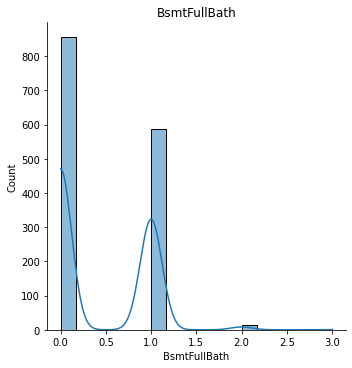

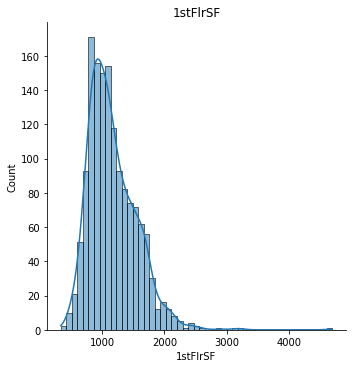

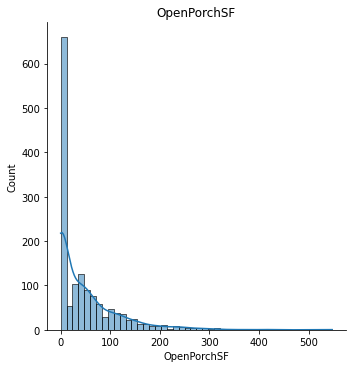

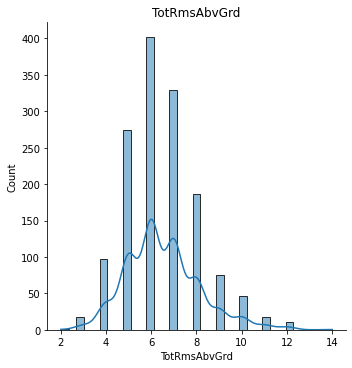

In [15]:
for col in sample_numeric_cols:
    col_val = fe_num_df[col]
    sns.displot(col_val, kde=True)
    plt.title(col)
    print('Skewness for column {}: {}'.format(col, skew(col_val)))

#### c. Identify significant variables using a correlation matrix

In [16]:
num_corr = fe_num_df.corr()

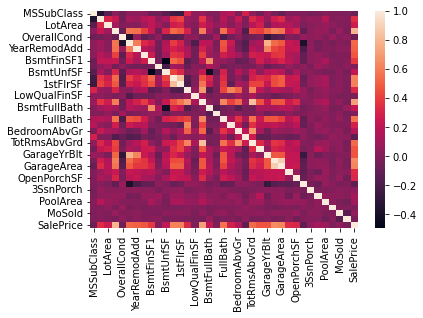

In [17]:
sns.heatmap(num_corr)
plt.show()

Lets find out highly correlated (>= 0.6) columns with the target column (Sales price).

In [18]:
corr_vals = num_corr['SalePrice']
corr_vals = corr_vals[(corr_vals > 0.6) | (corr_vals < -0.6)]
corr_vals

OverallQual    0.790982
TotalBsmtSF    0.613581
1stFlrSF       0.605852
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
SalePrice      1.000000
Name: SalePrice, dtype: float64

In [19]:
num_corr_cols = corr_vals.index[: -1].tolist()
len(num_corr_cols)

6

#### d. Pair plot for distribution and density

Lets go for a pairplot with 5 columns from the correlated columns and the SalePrice.

In [20]:
sample_num_df = fe_num_df[num_corr_cols[:-1] + ['SalePrice']]
sample_num_df.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,SalePrice
Id,,,,,,
1,7,856,856,1710,2,208500
2,6,1262,1262,1262,2,181500
3,7,920,920,1786,2,223500
4,7,756,961,1717,3,140000
5,8,1145,1145,2198,3,250000


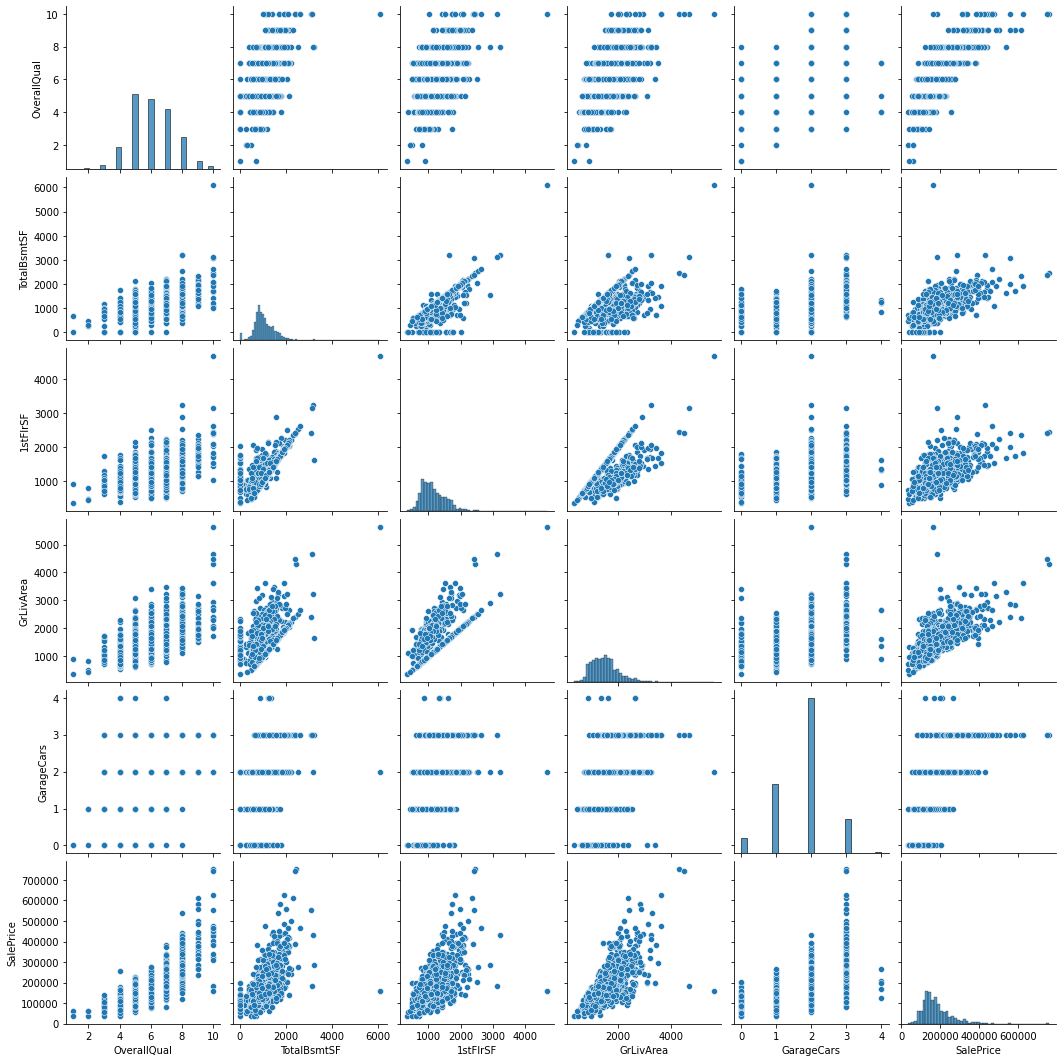

In [21]:
sns.pairplot(sample_num_df)
plt.show()

### 4. EDA of categorical variables

#### a. Missing value treatment

In [23]:
nan_counts_cat = fe_cat_df.isna().sum()
nan_counts_cat = nan_counts_cat[nan_counts_cat > 0]
nan_counts_cat

GarageCond        81
MasVnrType         8
GarageQual        81
MiscFeature     1406
Fence           1179
Alley           1369
BsmtQual          37
BsmtExposure      38
GarageFinish      81
FireplaceQu      690
BsmtCond          37
BsmtFinType2      38
Electrical         1
PoolQC          1453
BsmtFinType1      37
GarageType        81
dtype: int64

We can either delete the record or replace with mode value.

As there is a chance that we need to merge both datasets, its better not to delete any record.

In [24]:
for col in nan_counts_cat.index:
    fe_cat_df[col] = fe_cat_df[col].fillna(fe_cat_df[col].mode()[0])

fe_cat_df.isna().sum().sum()

0

#### b. Count plot and box plot for bivariate analysis

Lets take a sample of columns for EDA.

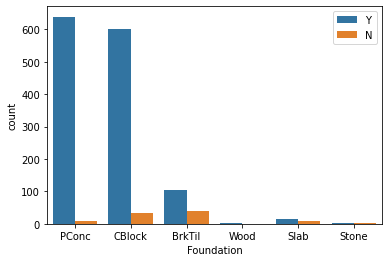

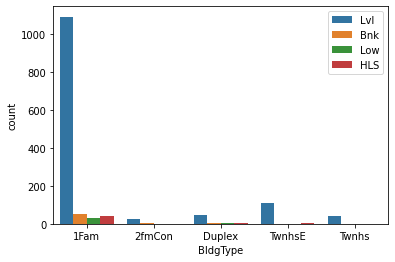

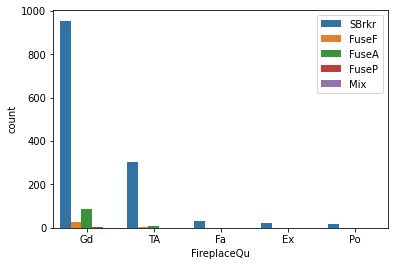

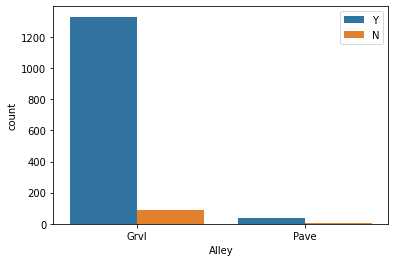

In [27]:
# Coun plot
for i in range(4):
    selected_cols = sample(categorical_cols, 2)
    sns.countplot(x=selected_cols[0], hue=selected_cols[1], data=fe_cat_df[selected_cols])
    plt.legend(loc='upper right')
    plt.show()

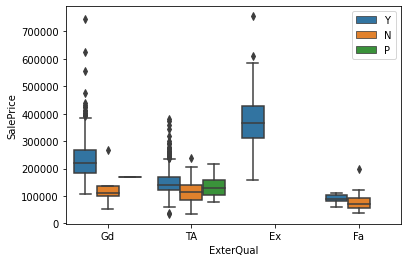

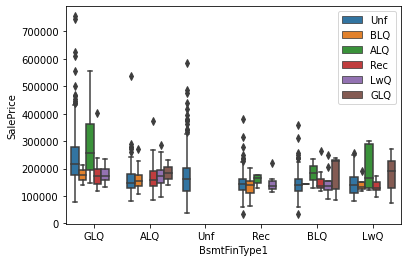

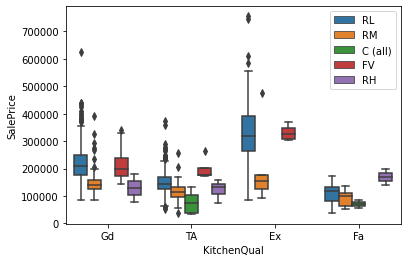

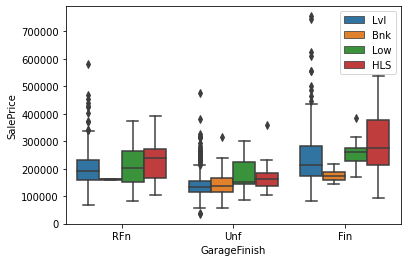

In [28]:
# Box plot
for i in range(4):
    selected_cols = sample(categorical_cols, 2)
    sns.boxplot(x =selected_cols[0], y ='SalePrice', data = fe_df, hue =selected_cols[1])
    plt.legend(loc='upper right')
    plt.show()

#### c. Identify significant variables using p-values and Chi-Square values

In [29]:
target = 'SalePrice'

In [30]:
cat_corr_cols = []

In [31]:
for feature in categorical_cols:
    fe_cat_df_cross_tab = pd.crosstab(index=fe_df[target], columns=fe_df[feature])
    if (chi2_contingency(fe_cat_df_cross_tab)[1] < 0.05):
        cat_corr_cols.append(feature)

In [32]:
cat_corr_cols

['MasVnrType',
 'GarageQual',
 'LotConfig',
 'LotShape',
 'Heating',
 'KitchenQual',
 'BsmtQual',
 'BsmtExposure',
 'Neighborhood',
 'GarageFinish',
 'MSZoning',
 'FireplaceQu',
 'Street',
 'BsmtCond',
 'CentralAir',
 'ExterQual',
 'Foundation',
 'SaleType',
 'ExterCond',
 'SaleCondition']

#### 5. Combine all the significant categorical and numerical variables

In [33]:
selected_cols = num_corr_cols + cat_corr_cols
len(selected_cols)

26

In [34]:
new_fe_df = fe_df[selected_cols]

In [37]:
num_nan_cols = ['GarageYrBlt', 'MasVnrArea', 'LotFrontage']
cat_nan_cols = list(nan_counts_cat.index)

In [39]:
nan_cols = new_fe_df.columns[new_fe_df.isna().sum() > 0]

In [40]:
for col in nan_cols:
    if col in num_nan_cols:
        new_fe_df[col].fillna(new_fe_df[col].median(), inplace=True)
    elif col in cat_nan_cols:
        new_fe_df[col].fillna(new_fe_df[col].mode()[0], inplace=True)

new_fe_df.isna().sum().sum()        

0

#### 6. Plot box plot for the new dataset to find the variables with outliers

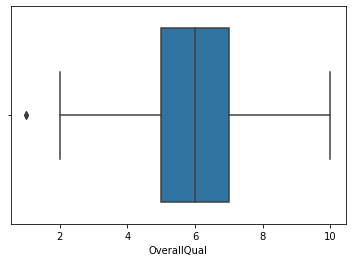

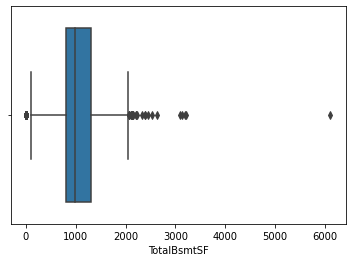

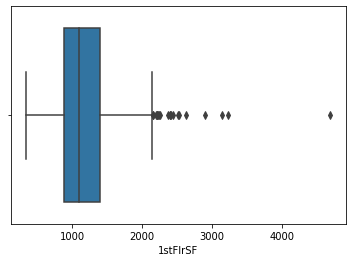

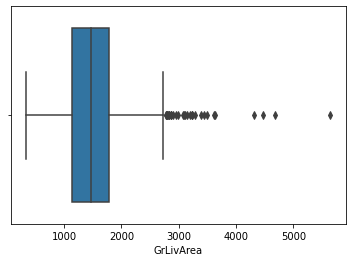

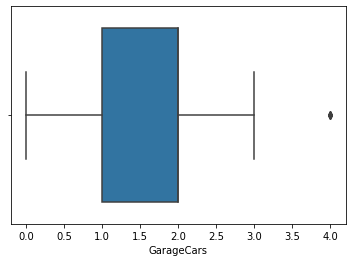

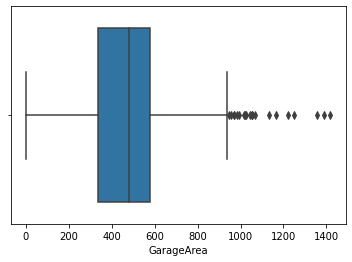

In [41]:
for col in num_corr_cols:
    sns.boxplot(new_fe_df[col])
    plt.show()

In [42]:
num_corr_cols

['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageCars',
 'GarageArea']

In [64]:
new_fe_df = new_fe_df[new_fe_df['OverallQual'] >= 2]
new_fe_df = new_fe_df[(new_fe_df['TotalBsmtSF'] >= 200) & (new_fe_df['TotalBsmtSF'] <= 1900)]
new_fe_df = new_fe_df[new_fe_df['1stFlrSF'] <= 2000]
new_fe_df = new_fe_df[new_fe_df['GrLivArea'] <= 2600]
new_fe_df = new_fe_df[new_fe_df['GarageCars'] <= 3.0]
new_fe_df = new_fe_df[new_fe_df['GarageArea'] <= 900]

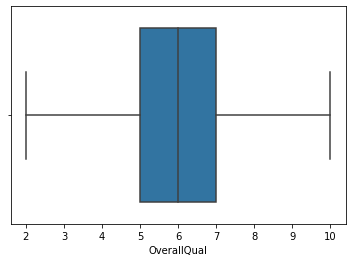

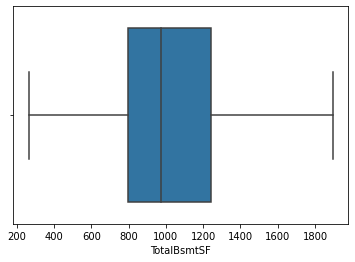

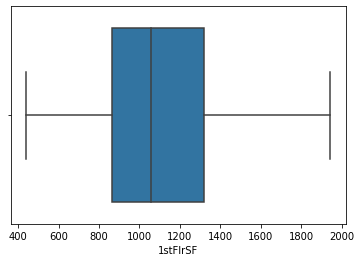

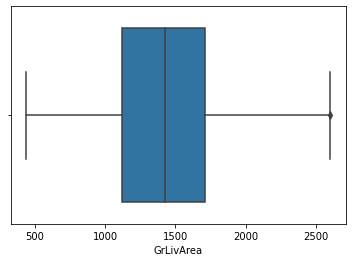

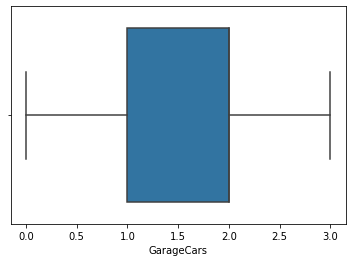

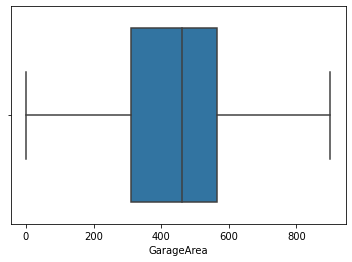

In [65]:
for col in num_corr_cols:
    sns.boxplot(new_fe_df[col])
    plt.show()

Now data is ready for modeling.